# Mini-Project

Today we will be learning how to plot data on a map and will also be introduced to pandas and numpy

*Thanks to Ahmed Qassim for tips on exporting a map using a bounding box*
https://medium.com/@abuqassim115/thanks-for-your-response-frank-fb869824ede2

*Thanks to Aurelien Geron for making the data sets from his book, Hands-On Machine Learning, publically accessible*
https://github.com/ageron/handson-ml/tree/master/datasets

*Thanks to Ian Downard for tips on showing maps using an image with matplotlib and for the link to the CA housing dataset*
https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

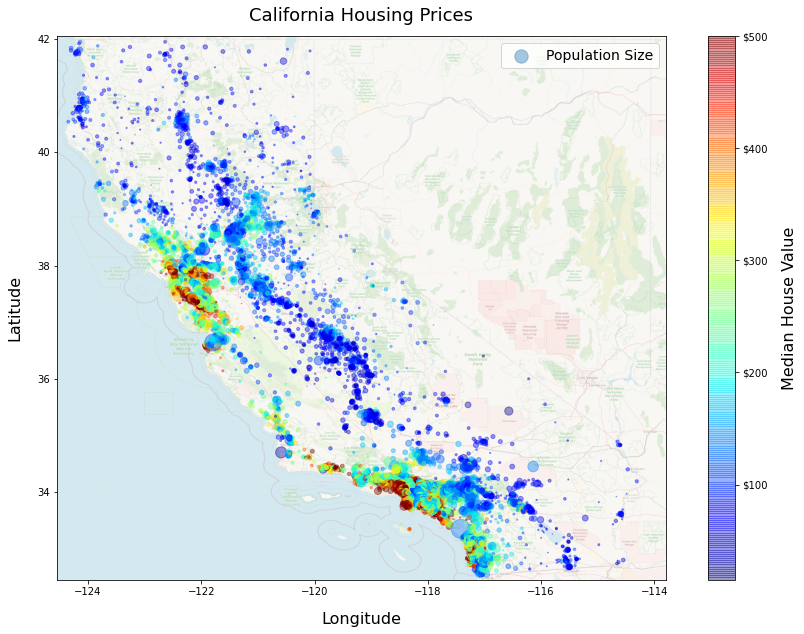

## The `urllib` and `json` Version

In [8]:
import json
import urllib.request

url_link  = urllib.request.urlopen("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson")
raw_data  = url_link.read()
json_data = json.loads(raw_data)
json_data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [23]:
json_data["features"][2]

{'type': 'Feature',
 'properties': {'mag': 1.97,
  'place': '5km NW of The Geysers, CA',
  'time': 1604888028550,
  'updated': 1604889485765,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73479641',
  'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc73479641.geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'automatic',
  'tsunami': 0,
  'sig': 60,
  'net': 'nc',
  'code': '73479641',
  'ids': ',nc73479641,',
  'sources': ',nc,',
  'types': ',focal-mechanism,nearby-cities,origin,phase-data,scitech-link,',
  'nst': 37,
  'dmin': 0.004269,
  'rms': 0.05,
  'gap': 32,
  'magType': 'md',
  'type': 'earthquake',
  'title': 'M 2.0 - 5km NW of The Geysers, CA'},
 'geometry': {'type': 'Point',
  'coordinates': [-122.7904968, 38.8100014, 2.77]},
 'id': 'nc73479641'}

In [10]:
def get_earthquake_data(earthquake_json):
    lats = []
    lons = []
    mags = []
    for row in earthquake_json.get('features', []):
        properties = row.get('properties',  {})
        data = properties.get('mag', None)
        geometry = row.get('geometry',  {})
        coordinates = geometry.get('coordinates',  {})
        if data != None:
            lons.append(coordinates[0])
            lats.append(coordinates[1])
            mags.append(data)
    return lons, lats, mags

lons, lats, mags = get_earthquake_data(json_data)
print("Downloaded {} earthquake magnitudes".format(len(mags)))
print("Downloaded {} earthquake latitudes".format(len(lats)))
print("Downloaded {} earthquake longitudes".format(len(lons)))

Downloaded 11970 earthquake magnitudes
Downloaded 11970 earthquake latitudes
Downloaded 11970 earthquake longitudes


In [11]:
print(min(mags))
print(max(mags))

-1.39
7.6


In [12]:
x_coords = []
y_coords = []
dot_size = []

for i in range(len(lons)):
    lon = lons[i]
    lat = lats[i]
    mag = mags[i]
    if lon > -124.55 and lon < -113.80 and lat > 32.45 and lat < 42.05:
        dot_size.append(10 ** mag / 10)
        x_coords.append(lon)
        y_coords.append(lat)

print("Filtered down to {} earthquake longitudes".format(len(x_coords)))
print("Filtered down to {} earthquake latitudes".format(len(y_coords)))
print("Filtered down to {} earthquake magnitudes".format(len(dot_size)))

Filtered down to 4900 earthquake longitudes
Filtered down to 4900 earthquake latitudes
Filtered down to 4900 earthquake magnitudes


In [13]:
print(min(dot_size))
print(max(dot_size))

0.014791083881682076
812.8305161640994


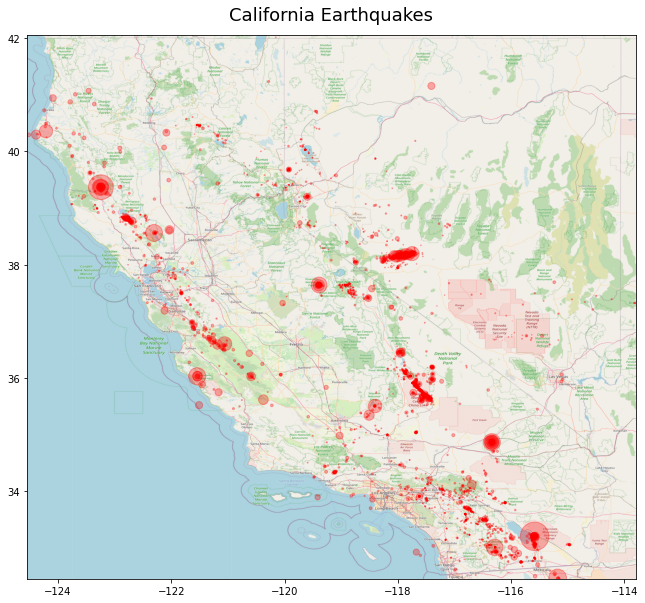

In [14]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california = mpimg.imread('california.png')

plt.figure(figsize=(15,10))

plt.scatter(x_coords, y_coords, alpha=0.3, s=dot_size, color="red")

plt.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05])

plt.title("California Earthquakes", fontsize=18, pad=15)
plt.show()

# Intro to Compression and Pandas

In [15]:
import tarfile
import urllib.request
   
housing_file = "housing.tgz"
housing_url = "https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(housing_url, housing_file)

housing_tgz = tarfile.open(housing_file)
housing_tgz.extractall()
housing_tgz.close()

In [16]:
import pandas as pd

df = pd.read_csv("housing.csv")

print(len(df))
df.head()

20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
df["scaled_population"] = df["population"] /100

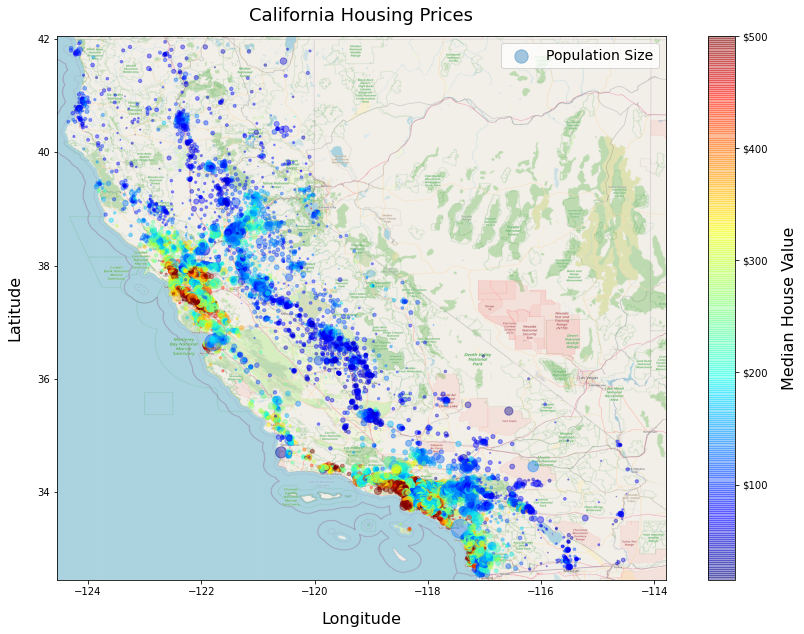

In [18]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california = mpimg.imread('california.png')

plt.figure(figsize=(15,10))

plt.scatter(df["longitude"], df["latitude"], s=df["scaled_population"],
            c=df["median_house_value"], cmap=plt.get_cmap("jet"),
            label="Population Size", alpha=0.4)
plt.legend(fontsize=14)

cb = plt.colorbar(pad=0.05)
cb.set_label("Median House Value", labelpad=15, fontsize=16)
cb_ticks = ["${0:d}".format(int(ytick//1000)) for ytick in cb.ax.get_yticks()]
cb.ax.set_yticklabels(cb_ticks)

plt.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05])
plt.ylabel("Latitude", fontsize=16, labelpad=15)
plt.xlabel("Longitude", fontsize=16, labelpad=15)
plt.title("California Housing Prices", fontsize=18, pad=15)
plt.show()